In [1]:
#logistic regression--->helpful to solve the problem of classification
#dv is categorical
#example x-no of hrs y-result
#x-1 2 3 4 5
#y-F F P P P
#in this case we will try to fit the graph not by using staight line instead we use sigmoid curve
#function of sigmoid curve is f(y)=1/(1+e power (-y)) value of y is y=mx+c values of y ranging from -infinity to +infinity
#f(y) ranging from 0 to 1
#there is hidden information here which is marks so based on number of hrs of hrs of study marks would be calculated
#based on marks grade will be calculated to find pass or fail from marks there would be some threshold marks for which after that pass before that fail


In [2]:
#so while working with these type of models we need to pick some threshold value 
#we would be fitting the data with sigmoid curve instead of straight line
#curve fitting-->fitting with sigmoid curve

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('titanic-training-data (1).csv')

In [5]:
#in titanic dataset survived is the dependent variable 0 not survied 1 survived name of passenger is not used here
#embarked is the port number

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#EXPLORING THE DATA
df.shape

(891, 12)

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#drop cabin column since there are many missing values
df=df.drop(['Cabin'],axis=1)

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<Axes: xlabel='Survived', ylabel='count'>

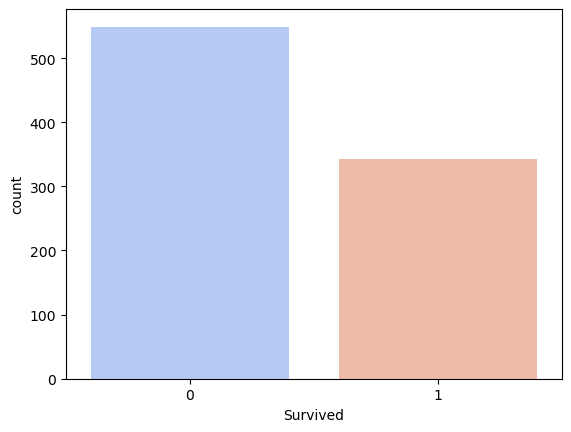

In [12]:
sns.countplot(x='Survived',data=df,palette='coolwarm')
#graph which shows number people survived and not survived

In [13]:
#showing the same values in table format
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

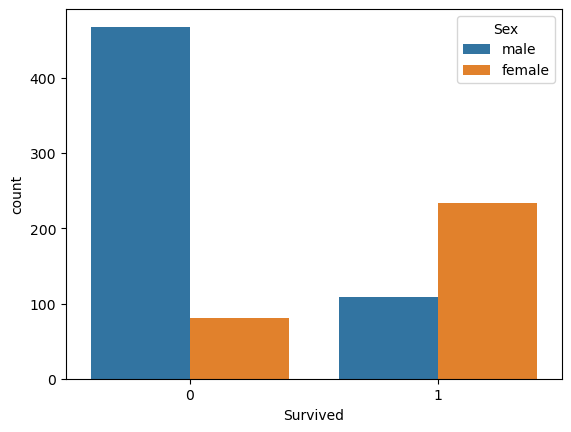

In [14]:
#now dividing the survived and not survived ratio based on the sex
sns.countplot(x='Survived',hue='Sex',data=df)

In [15]:
#now printing the above diagram in the form of table
#can be printed through cross tab using pandas
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


<Axes: xlabel='Survived', ylabel='count'>

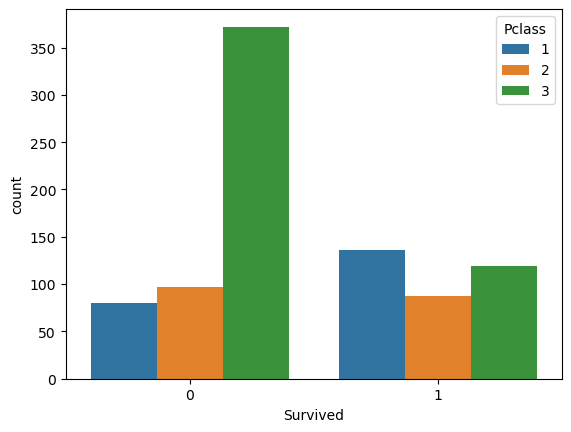

In [16]:
#now dividing the survived ratio based on pclass
sns.countplot(x='Survived',hue='Pclass',data=df)

In [17]:
#using crosstab
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Age', ylabel='Pclass'>

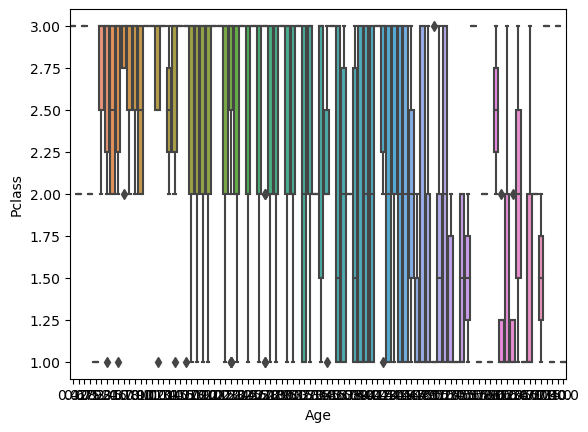

In [18]:
#finding boxplot
sns.boxplot(x='Age',y='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

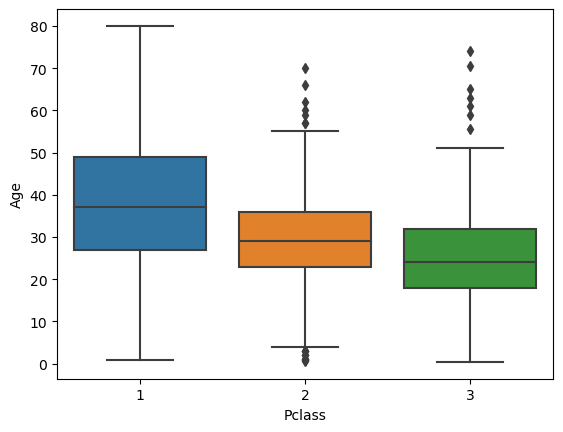

In [19]:
sns.boxplot(x='Pclass',y='Age',data=df)
#here wecan see that pclass 1 is widely used by all age group people and pclass 3 is mostly used by middle age as there 
#are more outliers the  diagram

In [20]:
#to drop all the missing values we use 
df=df.dropna()

In [21]:
df.shape

(712, 11)

In [22]:
#creating the dummies
df=pd.get_dummies(columns=['Sex','Embarked','Pclass'],data=df)

In [23]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


In [24]:
#passenger id,name,ticket,fare are not required so drop them
df=df.drop(['PassengerId','Name','Ticket','Fare'],axis=1)

In [25]:
df.head()

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,0,1,1,0,0
4,0,35.0,0,0,0,1,0,0,1,0,0,1


In [26]:
#not split into x and y axis y-survived dv x-all other
x=df.drop(['Survived'],axis=1)
y=df[['Survived']]

In [27]:
#spliting into training or testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
#random state 1 for logistic regression

In [28]:
#apply logistic regression model
model=LogisticRegression()
#fit the data into it
model.fit(xtrain,ytrain)
#to remove warnings write 

LogisticRegression()

In [29]:
#score of train data
model.score(xtrain,ytrain)

0.8052208835341366

In [30]:
#test data
model.score(xtest,ytest)

0.780373831775701

In [31]:
#another approach
#replace the missing values in age column with mean and embarked column with mode
df1=pd.read_csv('titanic-training-data (1).csv')

In [32]:
df1=df1.drop(['Cabin'],axis=1)

In [33]:
mean=df1['Age'].mean()
df1['Age']=df1['Age'].replace(np.nan,mean)

In [34]:
mode=df1['Embarked'].mode().values[0]
df1['Embarked']=df1['Embarked'].replace(np.nan,mode)

In [35]:
df1.shape

(891, 11)

In [36]:
#now make the model as in the previous way

In [37]:
#need to drop all the columns that are not requied
df1=df1.drop(['PassengerId','Name','Ticket','Fare'],axis=1)#if not done errors would occur

In [38]:
#perform onehot encoding for the data
#if not error
df1=pd.get_dummies(columns=['Sex','Embarked','Pclass'],data=df1)

In [39]:
x1=df1.drop(['Survived'],axis=1)
y1=df1[['Survived']]

In [40]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.30,random_state=1)

In [41]:
model1=LogisticRegression()
#fit the data into it
model1.fit(xtrain1,ytrain1)

LogisticRegression()

In [42]:
model1.score(xtrain1,ytrain1)

0.812199036918138

In [43]:
model1.score(xtest1,ytest1)

0.7798507462686567

<Axes: >

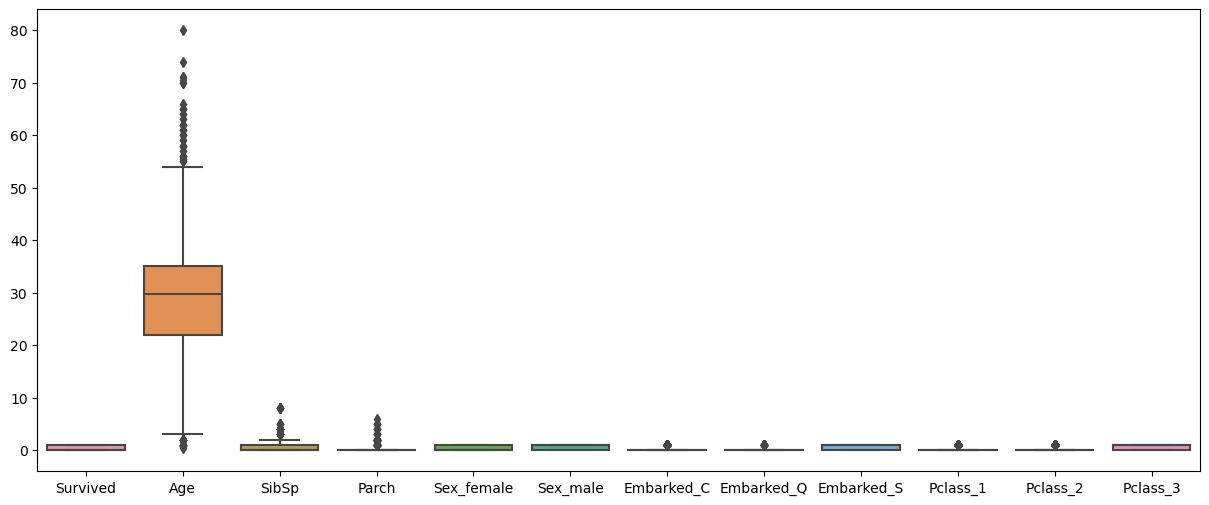

In [44]:
plt.figure(figsize=(15,6))
sns.boxplot(df1)

<Axes: >

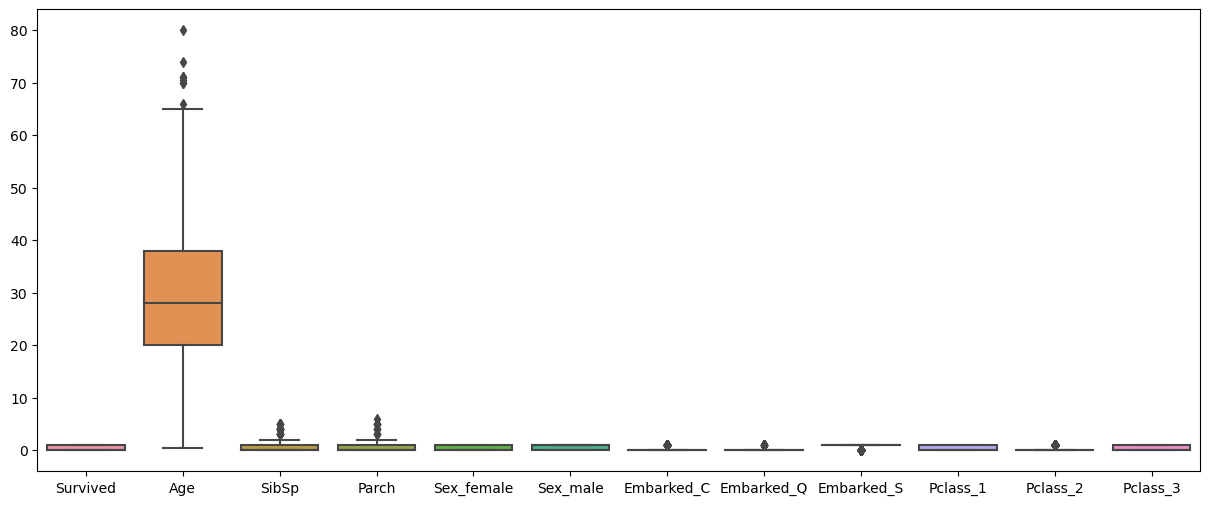

In [45]:
plt.figure(figsize=(15,6))
sns.boxplot(df)

In [46]:
#METRICS OF CLASSIFICATION MODEL
#in any classification model like logistic regression. in linear model we will find the terms like r square
#root mean square error mean square error mean absolute error as metrics here also there are some metrics they are as follows
#true positive--> if our model predicts positive and actually it is true
#true negative-->if model prdicts negative actually also negative    
#false positive-->predicts +ve but actuallu -ve
#false negative--> predicts -ve actually +ve
#confusion matrix
#recall
#presicion
#accuracy
#and there are many more
#in titanic dataset survived  and not survived the above attributes can be explained using this survived->+ve not->-ve
#model        pediction         actual
#TP             +ve              +ve
#TN             -ve              -ve
#FP             +ve              -ve
#FN             -ve               +ve

In [47]:
#confusion matrix p-predicted a-actual
#----------------------------------------------
#| p->  a down    |     +ve     |    -ve      |
#----------------------------------------------
#|    +ve         |     tp      |     fn      |
#----------------------------------------------
#|    -ve         |     fp      |      tn     |
#----------------------------------------------
#accuracy=  (tp+tn) / (tp+tn+fp+fn)
#recall=out of all positives how many ar true (tp)/(actual positve(ap))=  (tp)/(tp+fn)
#precision=(tp)/(tp+fp)

In [48]:
#previously we trained the model witn train data now let us predict the results using test data now let us use model variable 
#to do this
prediction=model.predict(xtest)#predict for the test data

In [49]:
#for doing the predictions we need to import these libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [50]:
#now getting the accuracy score
accuracy_score(ytest,prediction)

0.780373831775701

<Axes: >

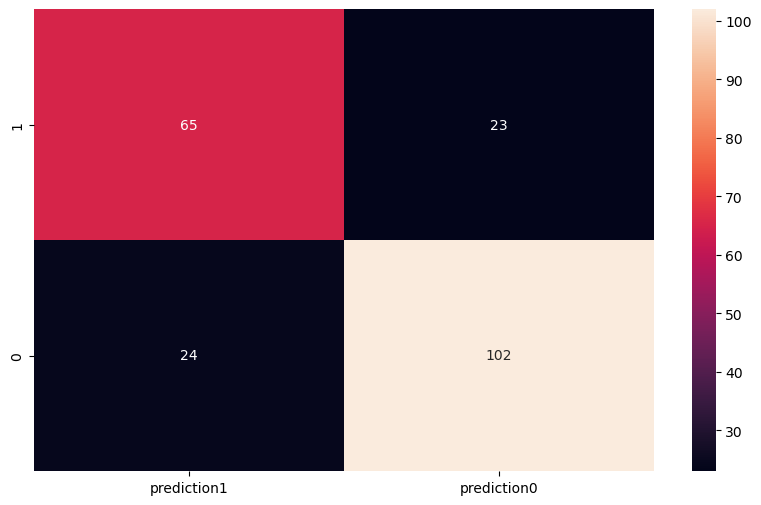

In [51]:
#now creating a heat map with test values of y and predicted test values of y using metrics.confusion_matrix 
#we will get the confusion matrix 1-true 0-false names we are giving as labels
cm=metrics.confusion_matrix(ytest,prediction,labels=[1,0])
dfcm=pd.DataFrame(cm,index=[i for i in["1","0"]],columns=[i for i in ["prediction1","prediction0"]])
plt.figure(figsize=(10,6))
sns.heatmap(dfcm,annot=True,fmt='g')